# Sentiment Analysis

## Local Imports and Load Data

In [1]:
# Local imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import re
import nltk
import string
import plotly.graph_objects as go
import plotly.express as px
import chart_studio.plotly as py
import gensim

from wordcloud import WordCloud, STOPWORDS
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk import word_tokenize, FreqDist
from textblob import TextBlob
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
np.random.seed(0)

%matplotlib inline

In [2]:
# Load cleaned tweets dataframe
df = pickle.load( open( "data/clean_tweets.p", "rb" ) )
df.head()

,created_at,id,text,source,truncated,geo,coordinates,place,retweeted_status,is_quote_status,...,lang,timestamp_ms,display_text_range,extended_tweet,possibly_sensitive,quoted_status,withheld_in_countries,entire_text,text_length,tweets
0,Tue Apr 28 17:56:45 +0000 2020,1255194256937046018,"RT @threadreaderapp: @TimeMayHeal Bonjour, the...","<a href=""http://twitter.com/download/android"" ...",False,None,None,None,{'created_at': 'Tue Apr 28 17:36:46 +0000 2020...,False,...,en,1588096605892,NaN,NaN,NaN,NaN,NaN,"RT @threadreaderapp: @TimeMayHeal Bonjour, the...",140,bonjour unroll asked simple analogy everyone g...
1,Tue Apr 28 17:57:41 +0000 2020,1255194489511202816,RT @mitchellvii: I don't care if COVID-19 had ...,"<a href=""http://twitter.com/download/iphone"" r...",False,None,None,None,{'created_at': 'Tue Apr 28 16:49:28 +0000 2020...,False,...,en,1588096661342,NaN,NaN,NaN,NaN,NaN,RT @mitchellvii: I don't care if COVID-19 had ...,140,care covid - 19 mortality rate 10 shut economy...
2,Tue Apr 28 17:58:40 +0000 2020,1255194736991797250,Act now and call on the President to take back...,"<a href=""http://phone2action.com"" rel=""nofollo...",True,None,None,None,NaN,False,...,en,1588096720346,"[0, 140]",{'full_text': 'Act now and call on the Preside...,True,NaN,NaN,Act now and call on the President to take back...,140,act call president take back dangerous threat ...
3,Tue Apr 28 17:58:40 +0000 2020,1255194737604268034,A dream,"<a href=""http://twitter.com/download/iphone"" r...",False,None,None,None,NaN,True,...,en,1588096720492,NaN,NaN,NaN,{'created_at': 'Tue Apr 28 12:09:05 +0000 2020...,NaN,A dream,7,dream
6,Tue Apr 28 17:58:40 +0000 2020,1255194737834942472,RT @FaheemYounus: COVID’s weekly deaths in Ame...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,None,None,None,{'created_at': 'Tue Apr 28 16:38:22 +0000 2020...,False,...,en,1588096720547,NaN,NaN,NaN,NaN,NaN,RT @FaheemYounus: COVID’s weekly deaths in Ame...,140,covid ’ weekly death america compared car cras...


In [3]:
# Keep important features for sentiment analysis
short_df = df[['entire_text', 'tweets','truncated']]
short_df

,entire_text,tweets,truncated
0,"RT @threadreaderapp: @TimeMayHeal Bonjour, the...",bonjour unroll asked simple analogy everyone g...,False
1,RT @mitchellvii: I don't care if COVID-19 had ...,care covid - 19 mortality rate 10 shut economy...,False
2,Act now and call on the President to take back...,act call president take back dangerous threat ...,True
3,A dream,dream,False
6,RT @FaheemYounus: COVID’s weekly deaths in Ame...,covid ’ weekly death america compared car cras...,False
...,...,...,...
231535,RT @thatgrapejuice: Just In! @Beyonce and Mega...,megan donating share proceeds savageremix hous...,False
231536,RT @kazweida: I’ll summarize: Scientists think...,’ summarize scientist think many 10000 could d...,False
231537,Is #Netanyahu playing the #COVID19 card to fur...,netanyahu playing covid19 card reign annexation,False
231539,RT @wttw: The non-binding pledge calls on land...,non-binding pledge call landlord allow tenant ...,False


# Sentiment Analysis using TextBlob

In [4]:
# Create a sentiment analyzer
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'
    
# Apply function to determine sentiment    
short_df['sentiment'] = short_df['tweets'].apply(analyze_sentiment)
short_df.head()

/Users/shirlwilliams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,entire_text,tweets,truncated,sentiment
0,"RT @threadreaderapp: @TimeMayHeal Bonjour, the...",bonjour unroll asked simple analogy everyone g...,False,Neutral
1,RT @mitchellvii: I don't care if COVID-19 had ...,care covid - 19 mortality rate 10 shut economy...,False,Neutral
2,Act now and call on the President to take back...,act call president take back dangerous threat ...,True,Negative
3,A dream,dream,False,Neutral
6,RT @FaheemYounus: COVID’s weekly deaths in Ame...,covid ’ weekly death america compared car cras...,False,Neutral


## Visual - General Pandemic Sentiment
Using Positive, Negative, and Neutral

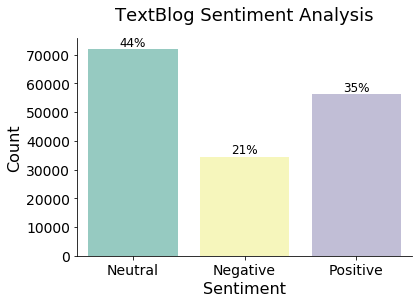

In [5]:
# Visualize the sentiments
ax = sns.countplot(x="sentiment", data=short_df, palette="Set3")
sns.despine()

# Add percentages
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}%'.format(100.*y/len(short_df)), (x.mean(), y), 
            ha='center', va='bottom', fontsize=12) # set the alignment of the text
    
plt.title('TextBlog Sentiment Analysis', fontsize=18, pad=18)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Sentiment', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('images/overall-sentiment.png')
plt.show();

# Sentiments using Vader Sentiment Analysis
Inspect each category of sentiment

In [6]:
# Instantiate the analyzer
analyzer = SentimentIntensityAnalyzer()

In [7]:
# Create a list of scores for sentiment levels
scores = []

# Add sentiments
for tweet in short_df['tweets']:
    scores.append(analyzer.polarity_scores(tweet))

In [11]:
# Convert the list of scores to a dataframe
polarity_df = pd.DataFrame(scores)
polarity_df.head()

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.000,0.629,0.371,0.7096
2,0.365,0.506,0.129,-0.6369
3,0.000,0.000,1.000,0.2500
4,0.511,0.489,0.000,-0.9274


In [12]:
# Group Scores
# Create a sentiment analyzer
def vader_sentiment(value):
 
    if value > 0:
        return 'Positive'
    elif value == 0:
        return 'Neutral'
    else:
        return 'Negative'
    
# Apply function to determine sentiment    
polarity_df['v_sentiment'] = polarity_df['compound'].apply(vader_sentiment)
polarity_df.head()

,neg,neu,pos,compound,v_sentiment
0,0.000,1.000,0.000,0.0000,Neutral
1,0.000,0.629,0.371,0.7096,Positive
2,0.365,0.506,0.129,-0.6369,Negative
3,0.000,0.000,1.000,0.2500,Positive
4,0.511,0.489,0.000,-0.9274,Negative


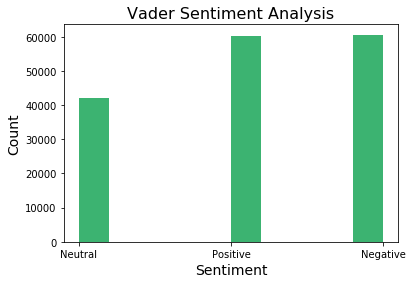

In [14]:
# Histogram comparison of positive, negative, and neutral by Vadar
plt.hist(polarity_df.v_sentiment, color='mediumseagreen')

# Plot formatting
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Vader Sentiment Analysis', fontsize=16)
plt.savefig('images/vader-sentiment')
plt.show()

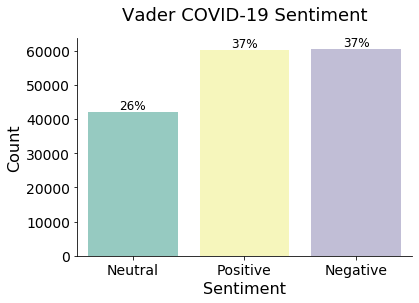

In [15]:
# Visualize the sentiments
ax = sns.countplot(x="v_sentiment", data=polarity_df, palette="Set3")
sns.despine()

# Add percentages
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}%'.format(100.*y/len(short_df)), (x.mean(), y), 
            ha='center', va='bottom', fontsize=12) # set the alignment of the text
    
plt.title('Vader COVID-19 Sentiment', fontsize=18, pad=18)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Sentiment', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('images/vader-sentiment.png')
plt.show();

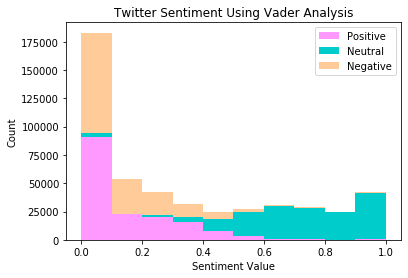

In [16]:
# Histogram comparison of positive, negative, and neutral by Vadar analysis

# Assign colors for each airline and the names
colors = ['#FF99FF', '#00CCCC', '#FFCC99']
names = ['Positive', 'Neutral', 'Negative']
         
# Stacked histogram with multiple airlines
plt.hist([polarity_df.neg, polarity_df.neu, polarity_df.pos], stacked=True, color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Sentiment Value')
plt.ylabel('Count')
plt.title('Twitter Sentiment Using Vader Analysis')
plt.savefig('images/vader-sent')
plt.show()

In [17]:
# Combine sentiments to tweets list for comparison
df_vader = short_df[['entire_text', 'tweets', 'sentiment']].merge(polarity_df, on=short_df.index)
df_vader.head()

,key_0,entire_text,tweets,sentiment,neg,neu,pos,compound,v_sentiment
0,0,"RT @threadreaderapp: @TimeMayHeal Bonjour, the...",bonjour unroll asked simple analogy everyone g...,Neutral,0.000,1.000,0.000,0.0000,Neutral
1,1,RT @mitchellvii: I don't care if COVID-19 had ...,care covid - 19 mortality rate 10 shut economy...,Neutral,0.000,0.629,0.371,0.7096,Positive
2,2,Act now and call on the President to take back...,act call president take back dangerous threat ...,Negative,0.365,0.506,0.129,-0.6369,Negative
3,3,A dream,dream,Neutral,0.000,0.000,1.000,0.2500,Positive
4,6,RT @FaheemYounus: COVID’s weekly deaths in Ame...,covid ’ weekly death america compared car cras...,Neutral,0.511,0.489,0.000,-0.9274,Negative


## Vader vs TextBlob Comparison
Will compare sentiments obtained through both methods

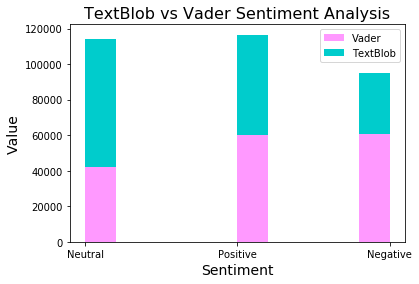

In [18]:
# Histogram comparison of positive, negative, and neutral by Vadar analysis and TextBlob

# Assign colors for each airline and the names
colors = ['#FF99FF', '#00CCCC']
names = ['Vader', 'TextBlob']
         
# Stacked histogram with multiple airlines
plt.hist([df_vader.v_sentiment, df_vader.sentiment], stacked=True, color=colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('TextBlob vs Vader Sentiment Analysis', fontsize=16)
plt.savefig('images/vader-vs-textblob')
plt.show()

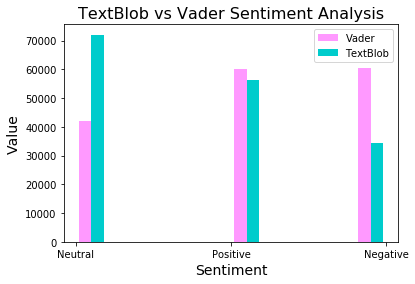

In [19]:
# Histogram comparison of positive, negative, and neutral by Vadar analysis and TextBlob

# Assign colors for each airline and the names
colors = ['#FF99FF', '#00CCCC']
names = ['Vader', 'TextBlob']
         
# Stacked histogram with multiple airlines
plt.hist([df_vader.v_sentiment, df_vader.sentiment], color=colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('TextBlob vs Vader Sentiment Analysis', fontsize=16)
plt.savefig('images/vader-vs-textblob')
plt.show()

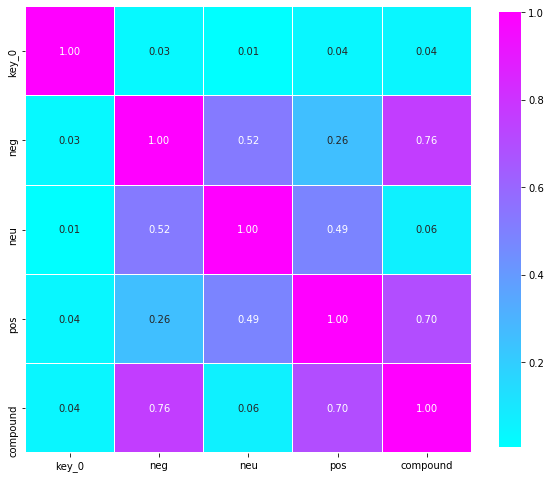

In [58]:
g = sns.heatmap(df_vader.corr().abs(), square=True, linewidths=.1,
                cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='cool')
g.figure.set_size_inches(10,10)
plt.autoscale()
plt.savefig('images/heatmap')
plt.show()

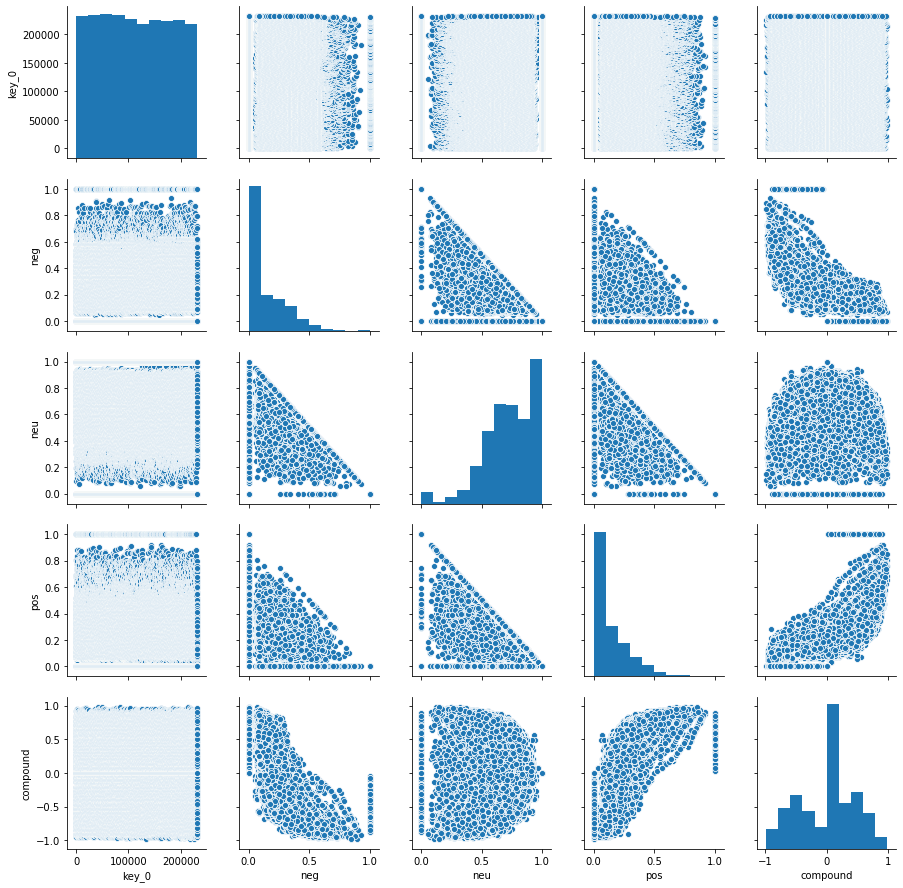

In [61]:
g = sns.pairplot(df_vader)
plt.savefig('images/pairplot')
plt.show()

## Investigate tweets with different sentiments

In [20]:
# Find differing sentiments and compare to tweet
df_vader[df_vader['sentiment'] != df_vader['v_sentiment']]

,key_0,entire_text,tweets,sentiment,neg,neu,pos,compound,v_sentiment
1,1,RT @mitchellvii: I don't care if COVID-19 had ...,care covid - 19 mortality rate 10 shut economy...,Neutral,0.000,0.629,0.371,0.7096,Positive
3,3,A dream,dream,Neutral,0.000,0.000,1.000,0.2500,Positive
4,6,RT @FaheemYounus: COVID’s weekly deaths in Ame...,covid ’ weekly death america compared car cras...,Neutral,0.511,0.489,0.000,-0.9274,Negative
6,10,RT @SpursOfficial: NHS staff at Tottenham Hots...,nh staff tottenham hotspur stadium observing m...,Neutral,0.131,0.686,0.183,0.2263,Positive
12,18,RT @GuidoFawkes: We looked into the interviewe...,looked interviewee panorama last night every s...,Negative,0.000,1.000,0.000,0.0000,Neutral
...,...,...,...,...,...,...,...,...,...
162864,231535,RT @thatgrapejuice: Just In! @Beyonce and Mega...,megan donating share proceeds savageremix hous...,Neutral,0.000,0.761,0.239,0.2960,Positive
162865,231536,RT @kazweida: I’ll summarize: Scientists think...,’ summarize scientist think many 10000 could d...,Positive,0.206,0.794,0.000,-0.5994,Negative
162866,231537,Is #Netanyahu playing the #COVID19 card to fur...,netanyahu playing covid19 card reign annexation,Neutral,0.000,0.735,0.265,0.2023,Positive
162867,231539,RT @wttw: The non-binding pledge calls on land...,non-binding pledge call landlord allow tenant ...,Neutral,0.253,0.616,0.130,-0.2023,Negative


# Sentiment Terms
* Word Cloud
* Key Terms
* Basic Sentiments
* Degree Sentiment

## Word Cloud
Created two - one with the filter words and one without

In [21]:
# Count of words and display top 50
cv = CountVectorizer()
count_matrix = cv.fit_transform(short_df.tweets)

word_count = pd.DataFrame(cv.get_feature_names(), columns=["word"])
word_count["count"] = count_matrix.sum(axis=0).tolist()[0]
word_count = word_count.sort_values("count", ascending=False).reset_index(drop=True)
word_count[:5]

,word,count
0,covid,55626
1,19,42019
2,pandemic,29175
3,people,15630
4,coronavirus,8417


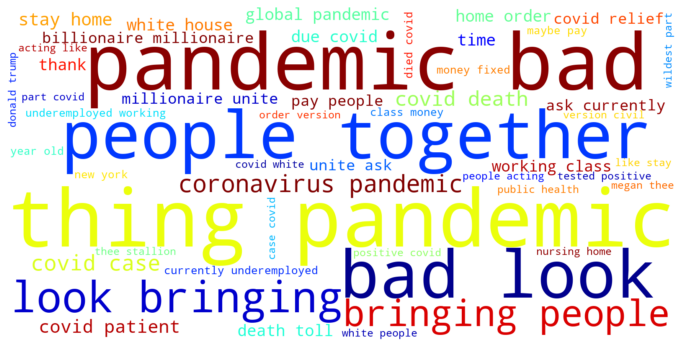

In [24]:
# Function to create word cloud - without filter words
def word_cloud(wd_list):
    stopwords = set(['covid', 'shelter', 'covid19', 'covid-19', 'pandemic'])
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=21,
        colormap='jet',
        max_words=50,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
    
word_cloud(df_vader.tweets)

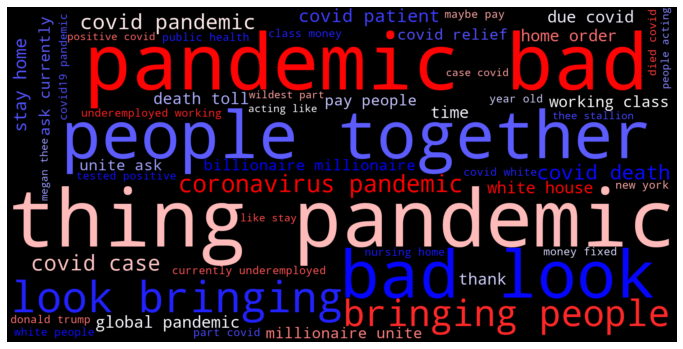

In [25]:
# Function to create word cloud - with filter words
def word_cloud(wd_list):
    all_words = ','.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='black',
        width=1600,
        height=800,
        random_state=21,
        colormap='bwr',
        max_words=50,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
    
word_cloud(df_vader.tweets)

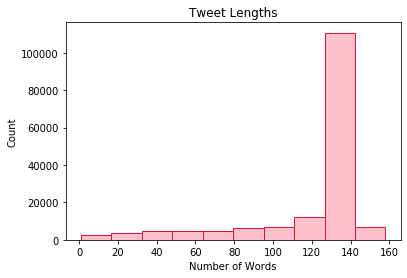

In [26]:
plt.hist(df.text_length, facecolor='pink', edgecolor='crimson')
plt.title('Tweet Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.savefig('images/tweet-lengths')
plt.show()

## Investigation of Key Terms
Find the sentiment of associated with key terms

In [27]:
import warnings
warnings.filterwarnings('ignore') # Word2Vec has lots of warnings


## Word2Vec Word Associations

In [28]:
# Tokenize words in the list of tweets
tokens = []
for text in df['tweets']:
    t = text.split(" ")
    tokens.append(t)


In [29]:
# Word2Vec model
model = gensim.models.Word2Vec(tokens, size=150, window=10, min_count=2, workers=10)
model.train(tokens, total_examples=len(tokens), epochs=5)

(7743414, 9253155)

### Similar Associations

In [51]:
w1='china'
model.wv.most_similar(positive=w1, topn=5)

[('ccp', 0.5851335525512695),
 ('communist', 0.5814058184623718),
 ('threatens', 0.5535464882850647),
 ('beijing', 0.5350298881530762),
 ('chinese', 0.5330914258956909)]

In [52]:
w2='trump'
model.wv.most_similar(positive=w2, topn=5)

[('trumps', 0.5900390148162842),
 ('impending', 0.4106641411781311),
 ('25thamendmentnow', 0.4021034240722656),
 ('joe', 0.4002717137336731),
 ('nytimes', 0.38993340730667114)]

In [53]:
w3='government'
model.wv.most_similar(positive=w3, topn=5) 

[('govt', 0.4931237995624542),
 ('keir', 0.4073762893676758),
 ('dodge', 0.39272385835647583),
 ('reserve', 0.38116455078125),
 ('prov', 0.3657515347003937)]

In [54]:
w4='patient'
model.wv.most_similar(positive=w4, topn=7)

[('hospita', 0.4864843785762787),
 ('hydroxychloroquine', 0.4802825450897217),
 ('patie', 0.47542697191238403),
 ('treating', 0.4738442599773407),
 ('patien', 0.47097766399383545),
 ('ivig', 0.4646819233894348),
 ('randomised', 0.46138450503349304)]

In [55]:
# similarity between two different words
model.wv.similarity(w1="medication",w2="hydroxychloroquine")

0.41395795

In [56]:
# similarity between two different words
model.wv.similarity(w1="pandemic",w2="covid")

0.14853546

In [59]:
w5='coronavirus'
model.wv.most_similar(positive=w5, topn=7)

[('precum', 0.45160111784935),
 ('coro', 0.43990641832351685),
 ('http', 0.3616288900375366),
 ('combatted', 0.3613893389701843),
 ('blogengage', 0.33651670813560486),
 ('unscathed', 0.3338173031806946),
 ('penta', 0.3321864902973175)]

### Which one doesn't belong

In [57]:
# Which one is the odd one out in this list?
model.wv.doesnt_match(["pandemic","health","medication"])

'pandemic'

In [58]:
# Which one is the odd one out in this list?
model.wv.doesnt_match(["people","coronavirus","death"])

'coronavirus'

## Vector Visualization

In [37]:
# Vector visualization
keys = ['coronavirus', 'trump', 'state', 'health', 'together', 'death', 'home']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [38]:
from sklearn.manifold import TSNE

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

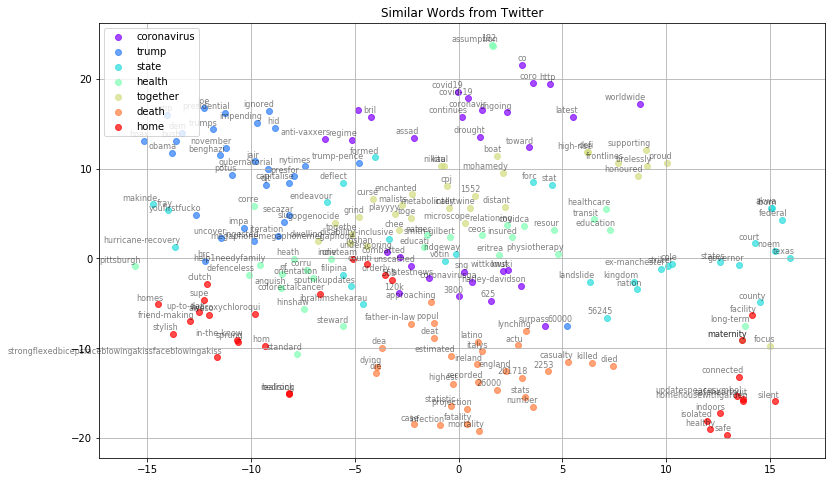

In [39]:
import matplotlib.cm as cm

def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(13, 8))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=2)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar Words from Twitter', keys, embeddings_en_2d, word_clusters, 0.7,
                        'images/similar_words.png')


# Future Possibilities
* Phrase analysis with gensim
* Run analysis with less cleaned data
* Run analysis with cleaner data
* Try other models 
* Use other word embeddings techniques